In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\\PG-DBDA\\PML\\CC GENERAL.csv") #read data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
  
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [4]:
# Dropping the CUST_ID column from the data
df = df.drop('CUST_ID', axis = 1)
  
# Handling the missing values
df.fillna(method ='ffill', inplace = True)
  
print(df.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [5]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)
  
# Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)

In [6]:
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P1', 'P2']
print(df_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544826
2  0.330633  0.268878
3 -0.481656 -0.097611
4 -0.563512 -0.482506


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

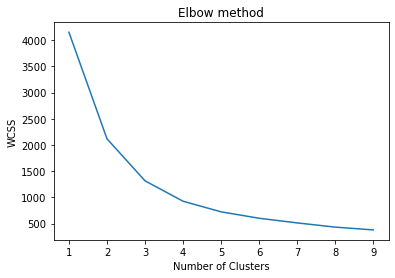

In [8]:
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(df_principal) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

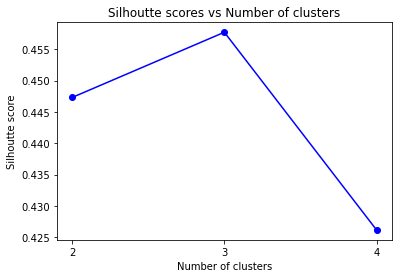

In [9]:
silhoutte_scores = [silhouette_score(df_principal, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [10]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(df_principal)

print('Silhoutte score of our model is ' + str(silhouette_score(df_principal, kmeans.labels_)))

Silhoutte score of our model is 0.44731423852545676


In [13]:
kmeans.cluster_centers_

array([[-0.46049676,  0.00327725],
       [ 0.49310019, -0.00350928]])

In [14]:
from sklearn.cluster import DBSCAN

In [15]:
dbscan = DBSCAN(eps=0.0375, min_samples=3).fit(df_principal)
labels = dbscan.labels_

In [16]:
pd.Series(dbscan.labels_).unique()

array([ 0,  1, -1,  2], dtype=int64)

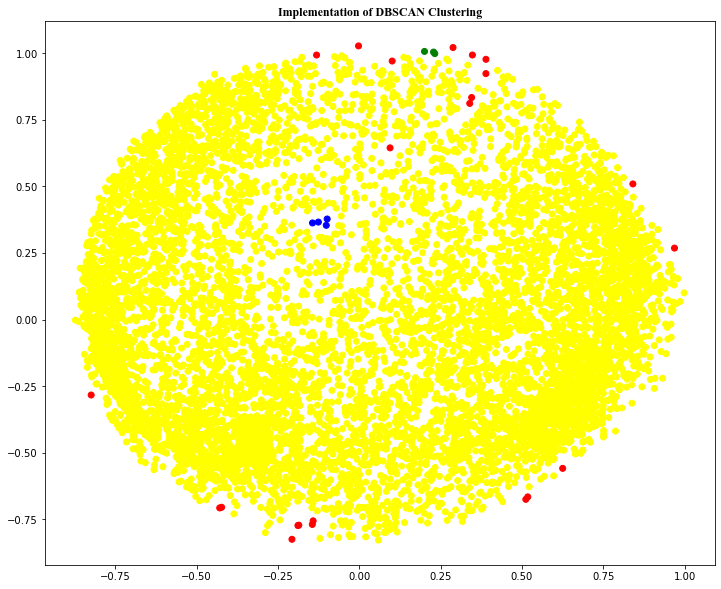

In [17]:
clusterColor = {0: u'yellow', 1: u'green', 2: 'blue', -1: u'red'}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(12, 10))
plt.scatter(df_principal['P1'], df_principal['P2'], c=colors)
plt.title("Implementation of DBSCAN Clustering", fontname="Times New Roman",fontweight="bold")
plt.show()

In [18]:
eps=np.arange(0.1, 0.8, 0.1)
min_samples=np.arange(5,13,1)
for ep, mns in zip(eps, min_samples):
    dbs=DBSCAN(eps=ep, min_samples=mns)
    dbs.fit(df_principal)
    print("Silhouette Coefficient for eps and min_samples",ep,mns,silhouette_score(df_principal, dbscan.labels_))

Silhouette Coefficient for eps and min_samples 0.1 5 -0.16145291536978157
Silhouette Coefficient for eps and min_samples 0.2 6 -0.16145291536978157
Silhouette Coefficient for eps and min_samples 0.30000000000000004 7 -0.16145291536978157
Silhouette Coefficient for eps and min_samples 0.4 8 -0.16145291536978157
Silhouette Coefficient for eps and min_samples 0.5 9 -0.16145291536978157
Silhouette Coefficient for eps and min_samples 0.6 10 -0.16145291536978157
Silhouette Coefficient for eps and min_samples 0.7000000000000001 11 -0.16145291536978157


In [19]:
silhouette_avg = silhouette_score(df_principal, dbscan.labels_)

In [20]:
silhouette_avg 

-0.16145291536978157

In [21]:
from sklearn.cluster import OPTICS

In [22]:
clustering = OPTICS(min_samples=30).fit(df_principal)
clustering.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [23]:
pd.Series(clustering.labels_).unique()

array([-1,  4,  0,  2,  5,  3,  1])

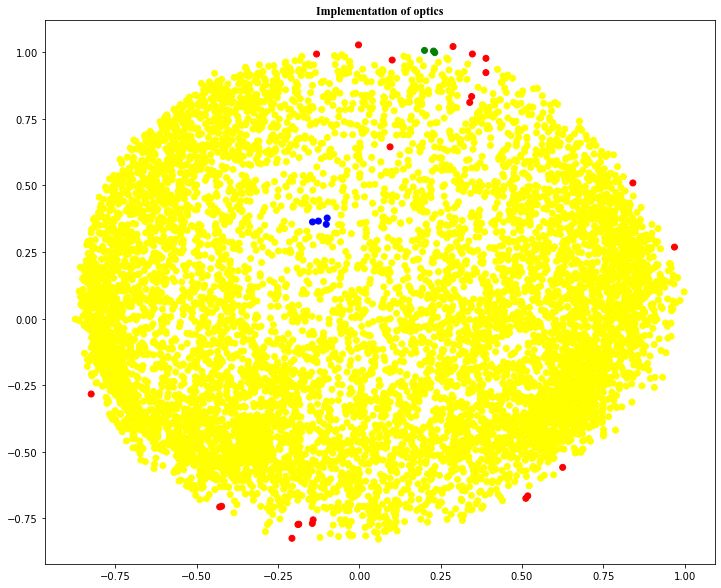

In [24]:
clusterColor = {0: u'yellow', 1: u'green', 2: 'blue', -1: u'red',5:'cyan',3:'orange'}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(12, 10))
plt.scatter(df_principal['P1'], df_principal['P2'], c=colors)
plt.title("Implementation of optics", fontname="Times New Roman",fontweight="bold")
plt.show()

In [25]:
score = silhouette_score(df_principal, clustering.labels_, metric='euclidean')

In [26]:
score

-0.3855627653602746

wcss=[]
for i in range(2,20):
    knm=KMeans(n_clusters=i, random_state=0)
    knm.fit(df_principal)
    wcss_vl=knm.inertia_
    wcss.append(wcss_vl)
    print("Silhouette Coefficient for num_cluster",i, silhouette_score(df_principal, knm.labels_))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(np.arange(2,20), wcss)
plt.show()


from kneed import KneeLocator
wcss=[]
for i in range(1,20):
    knm=KMeans(n_clusters=i, random_state=0)
    knm.fit(df_principal)
    wcss_vl=knm.inertia_
    wcss.append(wcss_vl)
kneedle = KneeLocator(np.arange(1,20), wcss, S=1.0, curve='convex', direction='decreasing')
print('The elbow point for the curve is at cluster numeber',kneedle.knee)